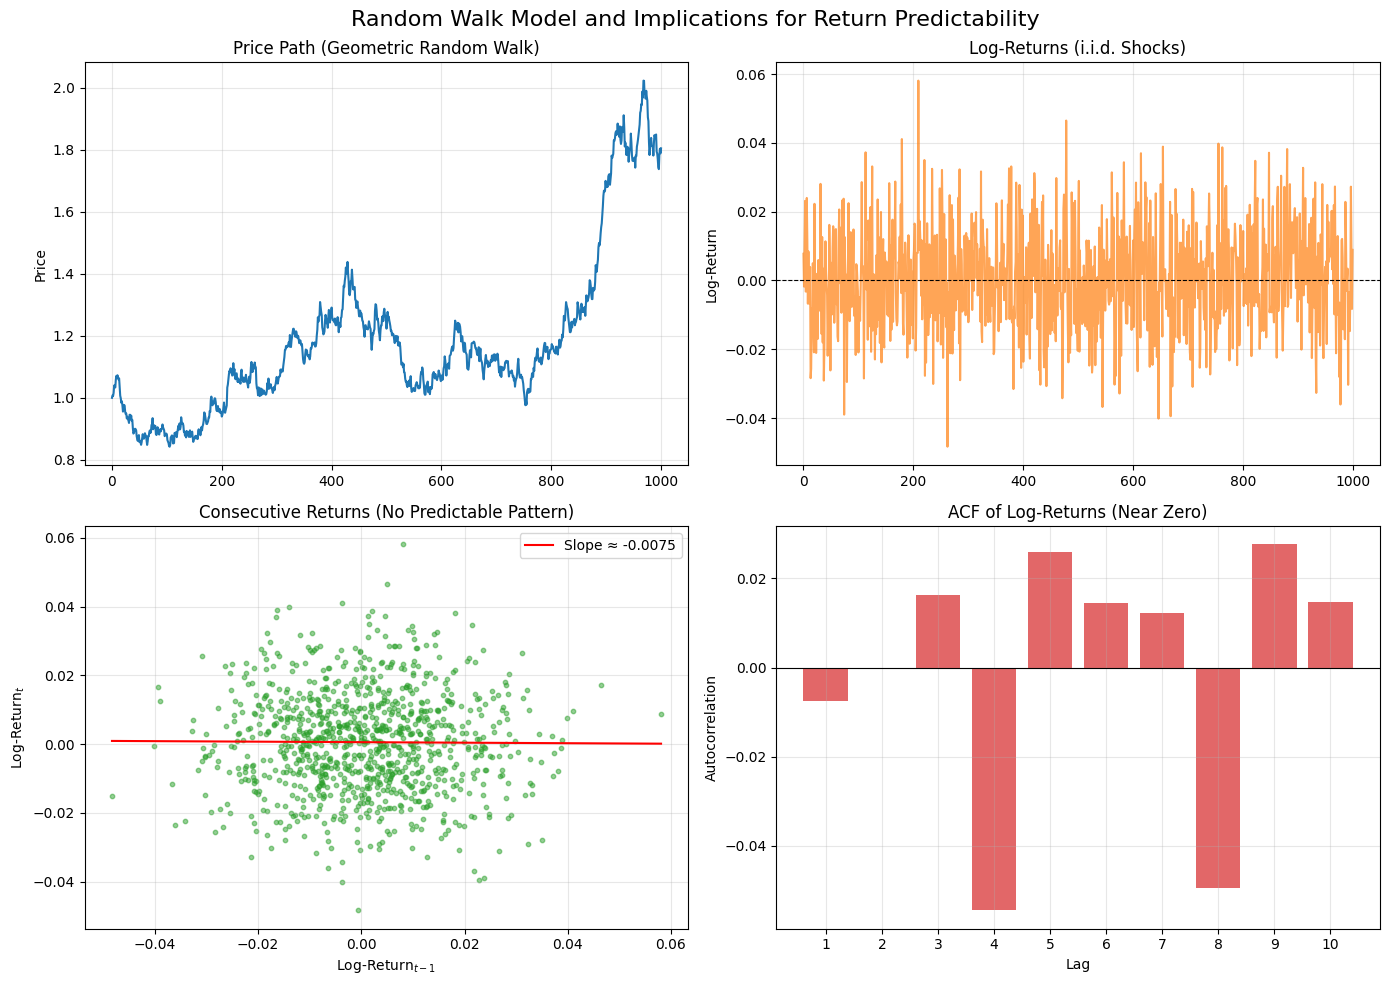

In [16]:
"""
Python & AI for Algorithmic Trading - Review Questions (Part I / Efficient Markets Baseline)
"""
# Review Questions

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# =============================================================================
# Question 1
# Define the Efficient Market Hypothesis (EMH) as a baseline model.
# Why does treating EMH as a baseline differ from claiming that no strategy can ever work?
# =============================================================================

# The Efficient Market Hypothesis (EMH) states that asset prices fully reflect all
# available information, implying that excess risk-adjusted returns are not achievable
# using that information alone.
#
# Treating EMH as a baseline model means adopting it as a null hypothesis: we assume
# no predictable edge exists until rigorous evidence proves otherwise. This differs
# from the absolute claim that no strategy can ever work, because the baseline approach
# allows for the possibility of temporary or hard-to-exploit inefficiencies while
# demanding strong out-of-sample, cost-adjusted proof of any claimed edge.

# =============================================================================
# Question 2
# Distinguish weak-form, semi-strong, and strong-form efficiency.
# For each form, describe the information set it assumes is already priced in.
# =============================================================================

# Weak-form: All historical price and volume data are fully reflected in current prices.
# Semi-strong: All publicly available information (prices, news, financial statements,
#   macroeconomic data, etc.) is reflected.
# Strong-form: All information, including private/insider information, is reflected.

# =============================================================================
# Question 3
# Describe a random-walk model for log prices and explain how it implies
# unpredictability of returns. How do simple returns differ from log-returns
# in this context?
# =============================================================================

def simulate_log_random_walk(steps=500, mu=0.0003, sigma=0.015, seed=42):
    """Simulate log-price random walk: log(P_t) = log(P_{t-1}) + ε_t, ε_t ~ N(mu, σ²)."""
    np.random.seed(seed)
    shocks = np.random.normal(loc=mu, scale=sigma, size=steps)
    log_prices = np.cumsum(shocks)
    log_prices = np.insert(log_prices, 0, 0.0)  # log(P_0) = 0
    return log_prices


def compute_returns(log_prices):
    """Compute log-returns and simple returns from log-prices."""
    log_returns = np.diff(log_prices)
    prices = np.exp(log_prices)
    simple_returns = np.diff(prices) / prices[:-1]
    return log_returns, simple_returns, prices


def autocorrelation(returns, lag=1):
    """Sample autocorrelation at given lag."""
    return np.corrcoef(returns[:-lag], returns[lag:])[0, 1]


# Execution and multi-panel visualization
log_prices = simulate_log_random_walk(steps=1000, mu=0.0003, sigma=0.015)
log_returns, simple_returns, prices = compute_returns(log_prices)

# Lagged scatter regression
slope, intercept, r_value, _, _ = linregress(log_returns[:-1], log_returns[1:])

# Autocorrelations up to lag 10
lags = np.arange(1, 11)
acfs = [autocorrelation(log_returns, lag=lag) for lag in lags]

# Four-panel figure illustrating information assimilation and unpredictability
fig = plt.figure(figsize=(14, 10))
fig.suptitle("Random Walk Model and Implications for Return Predictability", fontsize=16)

# 1. Price path – shows all past information assimilated into current price
ax1 = plt.subplot(2, 2, 1)
ax1.plot(prices, color="#1f77b4")
ax1.set_title("Price Path (Geometric Random Walk)")
ax1.set_ylabel("Price")
ax1.grid(True, alpha=0.3)

# 2. Log-returns – appear as white noise
ax2 = plt.subplot(2, 2, 2)
ax2.plot(log_returns, color="#ff7f0e", alpha=0.7)
ax2.axhline(0, color="black", linewidth=0.8, linestyle="--")
ax2.set_title("Log-Returns (i.i.d. Shocks)")
ax2.set_ylabel("Log-Return")
ax2.grid(True, alpha=0.3)

# 3. Scatter of consecutive returns – no linear relationship
ax3 = plt.subplot(2, 2, 3)
ax3.scatter(log_returns[:-1], log_returns[1:], alpha=0.5, s=10, color="#2ca02c")
x_line = np.linspace(log_returns.min(), log_returns.max(), 100)
ax3.plot(x_line, slope * x_line + intercept, color="red", label=f"Slope ≈ {slope:.4f}")
ax3.set_xlabel("Log-Return$_{t-1}$")
ax3.set_ylabel("Log-Return$_t$")
ax3.set_title("Consecutive Returns (No Predictable Pattern)")
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Autocorrelation function – bars near zero
ax4 = plt.subplot(2, 2, 4)
ax4.bar(lags, acfs, color="#d62728", alpha=0.7)
ax4.axhline(0, color="black", linewidth=0.8)
ax4.set_xlabel("Lag")
ax4.set_ylabel("Autocorrelation")
ax4.set_title("ACF of Log-Returns (Near Zero)")
ax4.set_xticks(lags)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Key points:
# - The price path drifts randomly but incorporates every past shock instantly.
# - Log-returns are independent draws → no serial correlation → future returns unpredictable.
# - Simple returns = exp(log-return) - 1; approximation holds well for small daily moves.
# - Exact relation preserves compounding: product of (1 + R_t) = final price ratio.

# =============================================================================
# Question 4
# Explain what it means to view a trading strategy as a hypothesis test.
# What are the null and alternative hypotheses in this setting, and what kind
# of evidence would you consider convincing?
# =============================================================================

# A trading strategy is treated as a hypothesis test against the EMH null.
# H₀: No genuine edge; performance attributable to chance, data mining, or unaccounted risk.
# H₁: Genuine exploitable edge after costs and risk adjustment.
#
# Convincing evidence: significant out-of-sample performance, robustness across regimes
# and parameters, positive net returns after realistic frictions, economic rationale,
# and forward/live confirmation.

# =============================================================================
# Question 5
# Outline the research workflow from idea to monitoring, and note where Python
# and artificial intelligence (AI) tools typically assist.
# =============================================================================

# Workflow:
# 1. Hypothesis formulation
# 2. Data collection and feature engineering
# 3. Signal and strategy implementation
# 4. Backtesting and diagnostics
# 5. Risk analysis and robustness checks
# 6. Deployment (paper → live) with logging/alerting
# 7. Ongoing monitoring and retirement
#
# Python: core infrastructure (pandas/NumPy for data, Matplotlib for diagnostics,
# PyTorch for ML/DL, broker APIs, Docker deployment).
#
# AI tools: idea brainstorming, code generation/refactoring, debugging,
# documentation, robustness suggestions — always under human oversight.
